<a href="https://www.kaggle.com/code/quratulain20/simple-linear-regression?scriptVersionId=192093079" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(30, 3)

In [9]:
df = df.drop('Unnamed: 0', axis=1)

Text(0, 0.5, 'Salary')

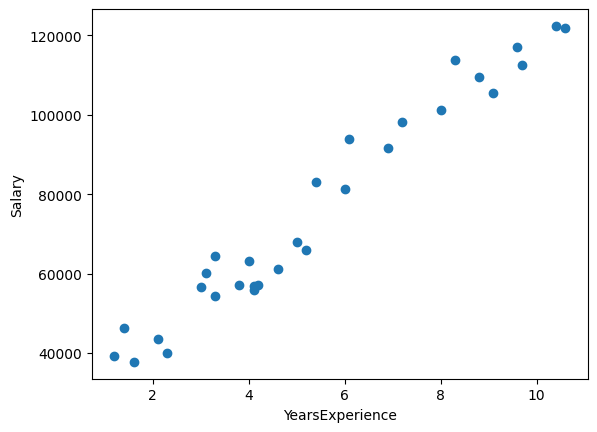

In [10]:
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [11]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [12]:
X.shape , y.shape

((30, 1), (30,))

In [13]:
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [14]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state = 2)


In [16]:
X_train.shape , y_train.shape

((24, 1), (24,))

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.predict(X_test.iloc[2].values.reshape(1,1))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([67457.3101364])

In [20]:
y_test.iloc[2]

61112.0

Text(0, 0.5, 'Salary')

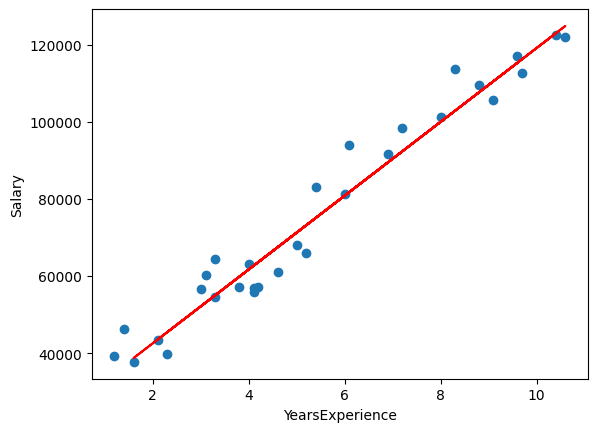

In [21]:
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
plt.plot(X_train, lr.predict(X_train), color= 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [22]:
m = lr.coef_
m

array([9569.58688543])

In [23]:
b = lr.intercept_
b

23437.21046340505

# Linear Regression using OOP

In [24]:
class SimpleLr:
    
    def __init__(self):
        self.m = None
        self.b = None
    
    def fit(self,X_train,y_train):
        num = 0
        den = 0
    
        for i in range(X_train.shape[0]):
            num = num + (X_train[i] - X_train.mean() *(y_train[i] - y_train.mean()))
            den = den + (X_train[i] - X_train.mean() * (X_train[i] - X_train.mean()))
        self.m = num/den
        self.b = (y_train.mean() - self.m*(X_train.mean()))
    
        print (self.m)
        print(self.b)


    def predict(self ,X_test):
        
        print(X_test)
        
        return (self.m * X_test) + self.b

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [26]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [27]:
X.shape ,  y.shape

((30,), (30,))

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y , test_size=0.2 , random_state = 2)

In [29]:
X_train.shape

(24,)

In [30]:
slr = SimpleLr()

In [31]:
slr.fit(X_train , y_train)

0.9999999999949841
78496.45416666669


In [32]:
X_test[2]

4.6

In [33]:
slr.predict(X_test[2])

4.6


78501.05416666667